In [1]:
pip install pandas --user

You should consider upgrading via the '/Users/menna_khaliel/opt/miniconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib --user

You should consider upgrading via the '/Users/menna_khaliel/opt/miniconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
buildings = pd.read_csv(r"/Users/menna_khaliel/data/Building_Permits.csv")

/Users/menna_khaliel/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (1,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
buildings

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,...,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1860840,100208392,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,10/25/2007,10/25/2007,0.0,8600,S,GREEN BAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2192348,100355821,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,07/28/2010,07/28/2010,0.0,2501,S,CALIFORNIA,...,NaN,NaN,30.0,3012.0,12.0,NaN,NaN,NaN,NaN,NaN
2,2295704,100404609,PERMIT - SIGNS,SIGN PERMIT,05/30/2012,09/03/2012,96.0,1368,E,53RD,...,NaN,NaN,41.0,410700.0,4.0,1.186240e+06,1.870439e+06,NaN,NaN,NaN
3,2295706,100404611,PERMIT - SIGNS,SIGN PERMIT,05/30/2012,09/03/2012,96.0,1368,E,53RD,...,NaN,NaN,41.0,410700.0,4.0,1.186240e+06,1.870439e+06,NaN,NaN,NaN
4,2351656,100430180,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,03/08/2012,03/08/2012,0.0,1260,N,HUDSON,...,NaN,NaN,8.0,804.0,27.0,1.173053e+06,1.908916e+06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613347,3029934,100816082,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,08/19/2019,01/15/2020,149.0,3511,W,DOUGLAS,...,NaN,NaN,29.0,291200.0,24.0,1.153124e+06,1.893026e+06,41.862311,-87.713383,POINT (-87.713382676241 41.862310776452)
613348,3100340,100858686,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,01/15/2020,01/15/2020,0.0,6035,S,MEADE,...,NaN,NaN,64.0,640300.0,13.0,1.136813e+06,1.863744e+06,41.782263,-87.773957,POINT (-87.773957010619 41.782263304288)
613349,3100002,100858520,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,01/15/2020,01/15/2020,0.0,3926,W,WILCOX,...,NaN,NaN,26.0,260800.0,28.0,1.150113e+06,1.899085e+06,41.878996,-87.724276,POINT (-87.7242756161 41.878995986582)
613350,3100352,100858698,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,01/15/2020,01/15/2020,0.0,7430,W,FOSTER,...,NaN,NaN,10.0,100500.0,41.0,1.125696e+06,1.933725e+06,41.974495,-87.813161,POINT (-87.813160767331 41.97449497624)


## Question 1

* The dataset contains interesting entries for comparing the buildings permit activity across neighborhood, which are: the permit_type, street_number, street_name. The permit_type provide concise information on what is the type of activity requiring permit and the entries are categories so they can be easily grouped across location info. The street_number, street_name, are helpful in comparing across neighborhoods. We can also add street_direction for more detailed comparison
It’s possible to look at the contact_1_ address info such as zip code and city. But this might be not the best practice since contact address info is not necessarily related to the building address info. Some of the contacts had different states such as Texas and Virginia. So we conclude that it’s not that relevant to the building address.



* The data does has missing data (displayed as 0) in some of the columns. This is important because we don’t want to compare entries together and have some of the entires missing values thus giving false comparison and conclusions about the data. It is important to clean the data and filter (appropriately for our analysis) empty entries



In [6]:
buildings.isnull()

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,...,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613347,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
613348,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
613349,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
613350,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [187]:
i_d  = buildings["ID"]
review_type = buildings["REVIEW_TYPE"]
street_name =  buildings["STREET_NAME"]
procc_time = buildings["PROCESSING_TIME"]
permit_num = buildings["PERMIT#"]
permit_type = buildings["PERMIT_TYPE"]


In [8]:
permit_type.isna().sum()

0

In [9]:
i_d.isna().sum()

0

In [10]:
street_name.isna().sum()

0

In [11]:
procc_time.isna().sum()

503

In [12]:
permit_num.isna().sum()

0

In [13]:
permit_type.isna().sum()

0

In [14]:
# pd.set_option('display.max_columns', None)
buildings.isna().sum()

ID                           0
PERMIT#                      0
PERMIT_TYPE                  0
REVIEW_TYPE                  6
APPLICATION_START_DATE     503
                          ... 
XCOORDINATE               1087
YCOORDINATE               1087
LATITUDE                  1834
LONGITUDE                 1834
LOCATION                  1834
Length: 119, dtype: int64

In [15]:
street_dir = buildings["STREET DIRECTION"]
suffix = buildings["SUFFIX"]

## Question 2

The most common values can be seen in the PERMIT_TYPE field, REVIEW_TYPE
In the PERMIT_TYPE field, it appears that the electric wiring in is the most common permit type for buildings in the dataset, followed by easy permit process and renovation/alteration. This informs us that many buildings are having electric wiring issues that need to be addressed. Renovation is also becoming an necessity for many of the buildings in Chicago area


In [17]:
perm_type_sum = pd.value_counts(permit_type).rename_axis('PERMIT_TYPE').reset_index(name='counts')
rev_type_sum = pd.value_counts(review_type)
street_name_sum = pd.value_counts(street_name)

In [18]:
perm_type_sum

,PERMIT_TYPE,counts
0,PERMIT - ELECTRIC WIRING,217783
1,PERMIT - EASY PERMIT PROCESS,163648
2,PERMIT - RENOVATION/ALTERATION,124108
3,PERMIT - SIGNS,39050
4,PERMIT - NEW CONSTRUCTION,22737
5,PERMIT - WRECKING/DEMOLITION,17254
6,PERMIT - ELEVATOR EQUIPMENT,14744
7,PERMIT - SCAFFOLDING,7613
8,PERMIT - REINSTATE REVOKED PMT,3260
9,PERMIT - PORCH CONSTRUCTION,3097


For the REVIEW_TYPE field, it appears that the easy permit web is the most common permit review type followed by easy permit and standard plan review. This informs us that electric wiring permits are mostly an easy permit type

In [19]:
rev_type_sum

EASY PERMIT WEB                   238664
EASY PERMIT                       144426
STANDARD PLAN REVIEW              108537
SIGN PERMIT                        39050
SELF CERT                          35301
DEMOLITION PERMIT                  17254
CONVEYANCE DEVICE PERMIT           14744
ELECTRICAL PLAN REVIEW              5398
TRADITIONAL DEVELOPER SERVICES      5372
FIRE PROTECTION SYSTEM              4009
DIRECT DEVELOPER SERVICES            591
Name: REVIEW_TYPE, dtype: int64

I tried to look at the street_name as well to see if the street reoccured frequently so that we can deduce what streets and neighborhood are requiring many buildings permits

It looks like Michigan street as well as Wacker street has many building permits requests, along with other streets such as La Salle and Clack etc.. This tells us that there are specific street that are in need for more building permits than others, which could mean that there are a widespread structural issues in those specific streets. 

In [20]:
street_name_sum

MICHIGAN             15621
WACKER               13068
LA SALLE              9110
CLARK                 7933
LAKE SHORE            6772
                     ...  
CAHILL                   1
KERCHEVAL                1
HASKINS                  1
STEPHEN A DOUGLAS        1
HOLDEN                   1
Name: STREET_NAME, Length: 1246, dtype: int64

## Question 3

A histogram of the building_fee_paid shows that of the payments were in the range of 0-150 with less frequent payments in higher ranges

(array([ 31353., 146981.,  66133.,  73827.,  33862.,  13677.,  27226.,
         20983.,   3358.,  47431.,   4052.,   4457.,   8239.,   6327.,
         28171.,   2922.,   2375.,   1665.,   4053.,   1814.,   1691.,
          1979.,  12254.,   1510.,   2224.,   1433.,   1779.,   1423.,
          1251.,   3274.]),
 array([   0.        ,   33.33333333,   66.66666667,  100.        ,
         133.33333333,  166.66666667,  200.        ,  233.33333333,
         266.66666667,  300.        ,  333.33333333,  366.66666667,
         400.        ,  433.33333333,  466.66666667,  500.        ,
         533.33333333,  566.66666667,  600.        ,  633.33333333,
         666.66666667,  700.        ,  733.33333333,  766.66666667,
         800.        ,  833.33333333,  866.66666667,  900.        ,
         933.33333333,  966.66666667, 1000.        ]),
 <BarContainer object of 30 artists>)

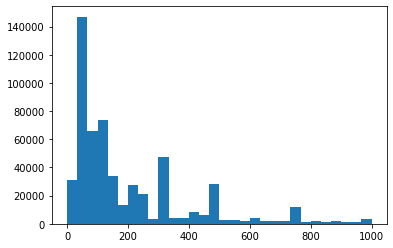

In [21]:
building_fee = buildings ["BUILDING_FEE_PAID"]
building_fee
plt.hist(building_fee, range=[0, 1000], bins= 30)

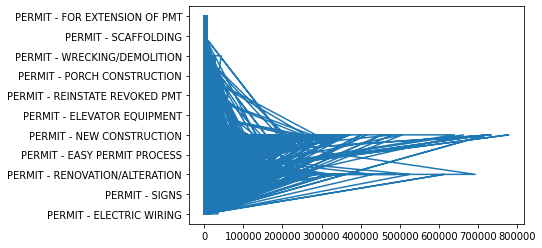

In [188]:
#experimenting with plotting against differnt columns
plt.plot(building_fee, permit_type)

A scatter plot of building_fee against permit_type was used to see if it would give a insightful representation of a relationship between these two categories. It shows that new constructions and renovation and alteration are mostly requiring high payment values.

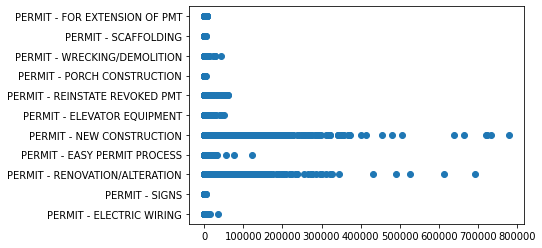

In [23]:
plt.scatter(building_fee, permit_type)

I plotted the processing_time against the permit_type to see if there is any correlation between permit type and processing time. It was interesting to see some negative values for the processing time. According to he dataset API, the processing_time field is “Number of days between APPLICATIONSTARTDATE and ISSUE_DATE” so the negative values indicate an issue date before the application start date which is interesting to know!

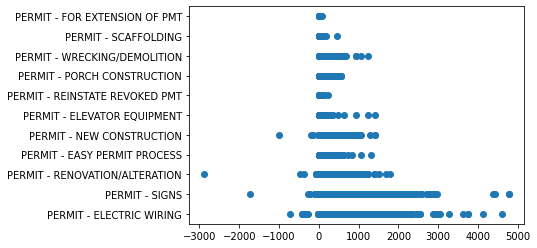

In [24]:
processing_time = buildings["PROCESSING_TIME"]
plt.scatter(processing_time, permit_type)

I plotted subtotal_paid category to see its behavior in the histogram. It showed a relatively similar behavior to the building_fee histogram

(array([ 45606., 160707.,  40370.,  50497.,  49338.,  31443.,  44643.,
         34592.,  10875.,   8093.,  16350.,  19435.,   5680.,   3604.,
          3917.,   3500.,  11995.,   2424.,   2532.,   2741.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

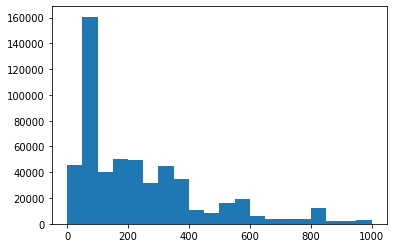

In [25]:
total_fee = buildings["SUBTOTAL_PAID"]
total_fee
plt.hist(total_fee, range=[0, 1000], bins=20)


To further compare the relationship between the buliding_fee and the subtotal_fee, I have plotted a simple line plot to see the correlation between these two categories. It shows that the building_fee comprises most of the subtotal_fee since there is a relatively tight distribution of the scattered entries

Text(0, 0.5, 'building_fee')

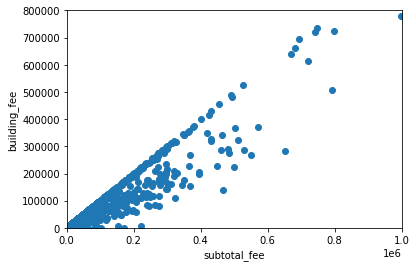

In [209]:
plt.scatter(total_fee, building_fee)
plt.xlim(0,1000000)
plt.ylim(0,800000)
plt.xlabel("subtotal_fee")
plt.ylabel("building_fee")

for a closer estimate I've plotted the line of best fit 

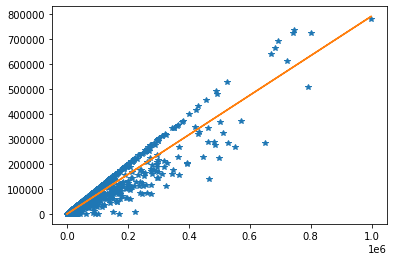

In [27]:
x = np.array(total_fee)
y = np.array(building_fee)
m,b = np.polyfit(x, y, 1)
plt.plot(x, y, '*')
plt.plot(x, m*x + b) #line of best fit

## Question 4

It appears from the histogram that there is a relatively close number of permits issued every year. This tells us that there is a cap on the number of permits every year. 

In [29]:
issue_date = pd.to_datetime(buildings['ISSUE_DATE'], errors='coerce')

In [30]:
issue_year = issue_date.dt.year #getting the year only

(array([46841.,     0., 47847.,     0., 41305.,     0., 40084.,     0.,
            0., 38999.,     0., 36766.,     0., 38534.,     0.,     0.,
        40525.,     0., 44006.,     0., 44665.,     0.,     0., 46006.,
            0., 47351.,     0., 47022.,     0., 48862.]),
 array([2006.        , 2006.43333333, 2006.86666667, 2007.3       ,
        2007.73333333, 2008.16666667, 2008.6       , 2009.03333333,
        2009.46666667, 2009.9       , 2010.33333333, 2010.76666667,
        2011.2       , 2011.63333333, 2012.06666667, 2012.5       ,
        2012.93333333, 2013.36666667, 2013.8       , 2014.23333333,
        2014.66666667, 2015.1       , 2015.53333333, 2015.96666667,
        2016.4       , 2016.83333333, 2017.26666667, 2017.7       ,
        2018.13333333, 2018.56666667, 2019.        ]),
 <BarContainer object of 30 artists>)

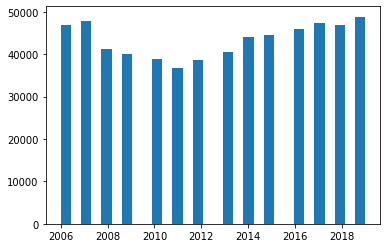

In [217]:
plt.hist(issue_year, range=[2006,2019], bins = 30)

## Question 5

In [219]:
permit_vs_procc = pd.DataFrame({'PERMIT_TYPE':permit_type, 'procc_time':processing_time})
permit_vs_procc

,PERMIT_TYPE,procc_time
0,PERMIT - ELECTRIC WIRING,0.0
1,PERMIT - ELECTRIC WIRING,0.0
2,PERMIT - SIGNS,96.0
3,PERMIT - SIGNS,96.0
4,PERMIT - RENOVATION/ALTERATION,0.0
...,...,...
613347,PERMIT - RENOVATION/ALTERATION,149.0
613348,PERMIT - ELECTRIC WIRING,0.0
613349,PERMIT - ELECTRIC WIRING,0.0
613350,PERMIT - ELECTRIC WIRING,0.0


In [220]:
grouped = new_table.groupby("PERMIT_TYPE")
grouped_summed = grouped.sum()
total_procc = grouped_summed.reset_index()
total_procc

,PERMIT_TYPE,procc_time
0,PERMIT - EASY PERMIT PROCESS,185816.0
1,PERMIT - ELECTRIC WIRING,5217826.0
2,PERMIT - ELEVATOR EQUIPMENT,29497.0
3,PERMIT - FOR EXTENSION OF PMT,122.0
4,PERMIT - NEW CONSTRUCTION,868918.0
5,PERMIT - PORCH CONSTRUCTION,63283.0
6,PERMIT - REINSTATE REVOKED PMT,5521.0
7,PERMIT - RENOVATION/ALTERATION,4036405.0
8,PERMIT - SCAFFOLDING,2121.0
9,PERMIT - SIGNS,3002393.0


In [36]:
freq = pd.DataFrame(perm_type_sum) #table with sum of categories in permit_type column

In [226]:
permit_typeVS_procc_count = total_procc.set_index('PERMIT_TYPE').join(freq.set_index('PERMIT_TYPE')) #joining the two tables 
#based on permit_type
permit_typeVS_procc_count

,procc_time,counts
PERMIT_TYPE,,
PERMIT - EASY PERMIT PROCESS,185816.0,163648
PERMIT - ELECTRIC WIRING,5217826.0,217783
PERMIT - ELEVATOR EQUIPMENT,29497.0,14744
PERMIT - FOR EXTENSION OF PMT,122.0,58
PERMIT - NEW CONSTRUCTION,868918.0,22737
PERMIT - PORCH CONSTRUCTION,63283.0,3097
PERMIT - REINSTATE REVOKED PMT,5521.0,3260
PERMIT - RENOVATION/ALTERATION,4036405.0,124108
PERMIT - SCAFFOLDING,2121.0,7613


In [227]:
procc_time = permit_duration["procc_time"] 
counts = permit_duration["counts"] 
#getting the average of the proccess time by dividing the frequency of the permit type of the processing time
avg_time = procc_time / counts

In [228]:
avg_time.sort_values(ascending = True)

PERMIT_TYPE
PERMIT - SCAFFOLDING               0.278602
PERMIT - EASY PERMIT PROCESS       1.135461
PERMIT - REINSTATE REVOKED PMT     1.693558
PERMIT - ELEVATOR EQUIPMENT        2.000610
PERMIT - FOR EXTENSION OF PMT      2.103448
PERMIT - PORCH CONSTRUCTION       20.433645
PERMIT - ELECTRIC WIRING          23.958831
PERMIT - RENOVATION/ALTERATION    32.523326
PERMIT - WRECKING/DEMOLITION      33.267822
PERMIT - NEW CONSTRUCTION         38.216036
PERMIT - SIGNS                    76.885864
dtype: float64

it appears from the resulted table that scafolding is the top permit feature correlating with the fastest processing time, followed by easy permit process and reinstate revoked payment  

In [40]:
commAreas = pd.read_csv(r"/Users/menna_khaliel/data/CommAreas.csv")

In [41]:
commAreas

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906
...,...,...,...,...,...,...,...,...,...,...
72,MULTIPOLYGON (((-87.69645961375822 41.70714491...,0,0,0,0,74,MOUNT GREENWOOD,74,7.558429e+07,48665.130539
73,MULTIPOLYGON (((-87.64215204651398 41.68508211...,0,0,0,0,75,MORGAN PARK,75,9.187734e+07,46396.419362
74,MULTIPOLYGON (((-87.83658087874365 41.98639611...,0,0,0,0,76,OHARE,76,3.718356e+08,173625.984660
75,MULTIPOLYGON (((-87.65455590025104 41.99816614...,0,0,0,0,77,EDGEWATER,77,4.844999e+07,31004.830946


## Question 6

I noticed that there are many empty values in the dataset entries. In addition, the columns contain number values that can be in different units. Also, the area number column in the commarea dataset is the same the community area column in the building_permits dataset



## Question 7

In [231]:
# joined_tables on key columns
joined_tables = buildings.merge(commAreas,left_on='COMMUNITY_AREA', right_on='AREA_NUMBE')
joined_tables

,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,...,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,2192348,100355821,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,07/28/2010,07/28/2010,0.0,2501,S,CALIFORNIA,...,MULTIPOLYGON (((-87.68739948177965 41.83480098...,0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210
1,3091422,100853741,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,12/05/2019,12/05/2019,0.0,4152,W,26TH,...,MULTIPOLYGON (((-87.68739948177965 41.83480098...,0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210
2,2054927,100294063,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,06/01/2009,06/01/2009,0.0,2533,S,CALIFORNIA,...,MULTIPOLYGON (((-87.68739948177965 41.83480098...,0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210
3,2067124,100300167,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,07/09/2009,07/09/2009,0.0,2501,S,CALIFORNIA,...,MULTIPOLYGON (((-87.68739948177965 41.83480098...,0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210
4,2218604,100369393,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,10/21/2010,10/22/2010,1.0,2501,S,CALIFORNIA,...,MULTIPOLYGON (((-87.68739948177965 41.83480098...,0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511476,3083339,100848875,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,10/31/2019,11/06/2019,6.0,4130,S,BERKELEY,...,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
511477,3086751,100850888,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,11/14/2019,11/14/2019,0.0,3635,S,ELLIS,...,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
511478,3092254,100854174,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,12/09/2019,12/13/2019,4.0,908,E,40TH,...,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
511479,3092958,100854626,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,12/11/2019,12/11/2019,0.0,4101,S,DREXEL,...,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153


## Question 8

* The neigborhoods that has the largest numbers of New Construction Permits are: WEST TOWN, LAKE VIEW, LOOP, NEAR NORTH SIDE, and LINCOLN PARK


* The neigborhoods that has the largest numbers of Renovation permits are: LOOP, NEAR NORTH SIDE, WEST TOWN, NEAR WEST SID, LAKE VIEW


* The neigborhoods that has the largest numbers of Demolishing permits are:	WEST TOWN, ENGLEWOOD, WEST ENGLEWOOD, LAKE VIEW, NORTH CENTER

In [160]:
#question 8
joined_permit_type = joined_tables["PERMIT_TYPE"]
joined_community = joined_tables["COMMUNITY"]
permit_and_community = pd.DataFrame({'PERMIT_TYPE':joined_permit_type, 'COMMUNITY':joined_community})
permit_vs_community = permit_and_community.groupby(["PERMIT_TYPE", "COMMUNITY"]).size().reset_index(name='counts')
permit_vs_community

,PERMIT_TYPE,COMMUNITY,counts
0,PERMIT - EASY PERMIT PROCESS,ALBANY PARK,1900
1,PERMIT - EASY PERMIT PROCESS,ARCHER HEIGHTS,512
2,PERMIT - EASY PERMIT PROCESS,ARMOUR SQUARE,451
3,PERMIT - EASY PERMIT PROCESS,ASHBURN,1769
4,PERMIT - EASY PERMIT PROCESS,AUBURN GRESHAM,2780
...,...,...,...
682,PERMIT - WRECKING/DEMOLITION,WEST LAWN,29
683,PERMIT - WRECKING/DEMOLITION,WEST PULLMAN,402
684,PERMIT - WRECKING/DEMOLITION,WEST RIDGE,70
685,PERMIT - WRECKING/DEMOLITION,WEST TOWN,977


In [232]:
new_const= permit_vs_community.loc[permit_vs_community['PERMIT_TYPE'] == 'PERMIT - NEW CONSTRUCTION']
# select_color = df.loc[df['Color'] == 'Green']

In [233]:
new_const

,PERMIT_TYPE,COMMUNITY,counts
239,PERMIT - NEW CONSTRUCTION,ALBANY PARK,107
240,PERMIT - NEW CONSTRUCTION,ARCHER HEIGHTS,26
241,PERMIT - NEW CONSTRUCTION,ARMOUR SQUARE,100
242,PERMIT - NEW CONSTRUCTION,ASHBURN,47
243,PERMIT - NEW CONSTRUCTION,AUBURN GRESHAM,55
...,...,...,...
311,PERMIT - NEW CONSTRUCTION,WEST LAWN,26
312,PERMIT - NEW CONSTRUCTION,WEST PULLMAN,74
313,PERMIT - NEW CONSTRUCTION,WEST RIDGE,147
314,PERMIT - NEW CONSTRUCTION,WEST TOWN,1511


In [234]:
new_cons.sort_values('counts', ascending = True)

,PERMIT_TYPE,COMMUNITY,counts
298,PERMIT - NEW CONSTRUCTION,RIVERDALE,7
251,PERMIT - NEW CONSTRUCTION,BURNSIDE,8
264,PERMIT - NEW CONSTRUCTION,FULLER PARK,10
252,PERMIT - NEW CONSTRUCTION,CALUMET HEIGHTS,11
245,PERMIT - NEW CONSTRUCTION,AVALON PARK,16
...,...,...,...
277,PERMIT - NEW CONSTRUCTION,LINCOLN PARK,1027
286,PERMIT - NEW CONSTRUCTION,NEAR NORTH SIDE,1067
280,PERMIT - NEW CONSTRUCTION,LOOP,1077
276,PERMIT - NEW CONSTRUCTION,LAKE VIEW,1112


In [179]:
renov = permit_vs_community.loc[permit_vs_community['PERMIT_TYPE'] == 'PERMIT - RENOVATION/ALTERATION']

In [235]:
renov

,PERMIT_TYPE,COMMUNITY,counts
394,PERMIT - RENOVATION/ALTERATION,ALBANY PARK,1385
395,PERMIT - RENOVATION/ALTERATION,ARCHER HEIGHTS,317
396,PERMIT - RENOVATION/ALTERATION,ARMOUR SQUARE,380
397,PERMIT - RENOVATION/ALTERATION,ASHBURN,524
398,PERMIT - RENOVATION/ALTERATION,AUBURN GRESHAM,1349
...,...,...,...
466,PERMIT - RENOVATION/ALTERATION,WEST LAWN,561
467,PERMIT - RENOVATION/ALTERATION,WEST PULLMAN,440
468,PERMIT - RENOVATION/ALTERATION,WEST RIDGE,1559
469,PERMIT - RENOVATION/ALTERATION,WEST TOWN,5030


In [182]:
renov.sort_values('counts', ascending = True)

,PERMIT_TYPE,COMMUNITY,counts
406,PERMIT - RENOVATION/ALTERATION,BURNSIDE,87
449,PERMIT - RENOVATION/ALTERATION,OAKLAND,116
424,PERMIT - RENOVATION/ALTERATION,HEGEWISCH,126
453,PERMIT - RENOVATION/ALTERATION,RIVERDALE,168
419,PERMIT - RENOVATION/ALTERATION,FULLER PARK,185
...,...,...,...
431,PERMIT - RENOVATION/ALTERATION,LAKE VIEW,4228
443,PERMIT - RENOVATION/ALTERATION,NEAR WEST SIDE,5013
469,PERMIT - RENOVATION/ALTERATION,WEST TOWN,5030
441,PERMIT - RENOVATION/ALTERATION,NEAR NORTH SIDE,8450


In [183]:
demol = permit_vs_community.loc[permit_vs_community['PERMIT_TYPE'] == 'PERMIT - WRECKING/DEMOLITION']

In [184]:
demol

,PERMIT_TYPE,COMMUNITY,counts
610,PERMIT - WRECKING/DEMOLITION,ALBANY PARK,67
611,PERMIT - WRECKING/DEMOLITION,ARCHER HEIGHTS,23
612,PERMIT - WRECKING/DEMOLITION,ARMOUR SQUARE,36
613,PERMIT - WRECKING/DEMOLITION,ASHBURN,18
614,PERMIT - WRECKING/DEMOLITION,AUBURN GRESHAM,187
...,...,...,...
682,PERMIT - WRECKING/DEMOLITION,WEST LAWN,29
683,PERMIT - WRECKING/DEMOLITION,WEST PULLMAN,402
684,PERMIT - WRECKING/DEMOLITION,WEST RIDGE,70
685,PERMIT - WRECKING/DEMOLITION,WEST TOWN,977


In [185]:
demol.sort_values('counts', ascending = True)

,PERMIT_TYPE,COMMUNITY,counts
665,PERMIT - WRECKING/DEMOLITION,OAKLAND,12
679,PERMIT - WRECKING/DEMOLITION,WEST ELSDON,12
646,PERMIT - WRECKING/DEMOLITION,KENWOOD,12
613,PERMIT - WRECKING/DEMOLITION,ASHBURN,18
641,PERMIT - WRECKING/DEMOLITION,HERMOSA,18
...,...,...,...
661,PERMIT - WRECKING/DEMOLITION,NORTH CENTER,772
647,PERMIT - WRECKING/DEMOLITION,LAKE VIEW,846
680,PERMIT - WRECKING/DEMOLITION,WEST ENGLEWOOD,917
633,PERMIT - WRECKING/DEMOLITION,ENGLEWOOD,923
